# Week 02 Assignment glucose level data


Missing data occurs commonly in many data applications. Especially wearable sensor devices encounter measurement errors resulting in missing data. Although pandas can handle missing data, for instance, to exclude missing data in the descriptive analysis, we might decide to reshape our data to improve quality. We might consider excluding certain rows, columns, or decide to impute our data if we take an argumentative approach. This week we will work with sensor data of a semester 01 project. The data is timeseries related but a lot of sensor errors occurred. First, we inspect the quality data. Then we will work with imputation, interpolation, and smoothing techniques to overcome this issue of the error readings. Finaly we plot the data. Visualization is a method to translate data into information. As a data scientist you should be able to choose an appropiate visualizations. 


Keywords: data loading, data inspection, data exploration, data cleaning, impute data, missing data, timeseries, pandas, visualization, interactive plots, overflow/underflow error

More to read
- https://fennaf.gitbook.io/bfvm22prog1/
- https://towardsdatascience.com/how-to-analyze-blood-glucose-data-with-python-data-science-packages-4f160f9564be


More about pandas and bokeh programming
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
- https://rubberduckdebugging.com/
- https://docs.bokeh.org/en/latest/docs/gallery.html


Learning objectives

- Further practice numpy / pandas
- Read, inspect, clean, and impute JSON data. Handle missing data
- Apply different interpolation/smoothing techniques
- Recognize overflow/underflow error
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles


Note: you can bring your own sensor data, but for the practical you need some missing data points. 

By the end of this week the student can:

- load a json dataset 
- typecast the Pandas DataFrame to appropiate data types
- inspect the dataset for quality and metadata information
- add a column with interpolated data in Pandas DataFrame
- perform visual analysis

please add your own topics you want to learn here: https://padlet.com/ffeenstra1/69vbvy0l8t32rq55


The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: interpolate the data](#3)
     - [Exercise 4.1](#ex-41)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: Challenge](#5)
     - [Exercise 6.1](#ex-61)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the json datafile `glucose.json` into a pandas dataframe. Check your dataframe with a `.head()` to compare with the expected outcome. 

Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>json.load() method reads a file, pd.read_json converts it to a Pandas DataFrame</li>
    <li>when loading into a Pandas DataFrame use records orientation </li>
</ul>
</details>

<a name='ex-11'></a>
### Code your solution

In [48]:
# CODE YOUR SOLUTION HERE
#import the needed modules
import yaml
import pandas as pd
import json
import numpy as np

#open the json file using config method
#first load the data, then read it.
with open("config.yaml","r") as stream:
    config = yaml.safe_load(stream)
file = config["filepath"]
data = open(file)
data_load = json.load(data)
df = pd.read_json(data_load)
df.head()

,ID,time,recordtype,glucose
0,2845.0,2019-04-25 00:08,1,109
1,2850.0,2019-04-25 00:50,1,
2,2877.0,2019-04-25 07:02,1,123
3,2881.0,2019-04-25 07:34,1,158
4,2886.0,2019-04-25 08:19,1,


#### Expected outcome: 

<a name='1'></a>
## Part 2: Prepare the data

Check the datatypes of your dataframe. The `glucose` field should be an integer, the `time` field should have a datetime format. If the datatypes are different you should typecast them to the right format.
Make sure that your dataset is sorted by the time column


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use astype() method or pandas.DataFrame.to_datetime() for instance</li>
    <li>make sure that the empty spaces are filled with NaN. Use errors='coerce'</li>
    <li>set_index(), sort_index() and reset_index() are helpful to sort on index</li>
</ul>
</details>

<a name='ex-21'></a>
### Code your solution

In [49]:
# CODE YOUR SOLUTION HERE

#changing the dtype of each columns using astype method
df['ID']=df['ID'].astype(np.int64)
df['glucose'] = pd.to_numeric(df['glucose'],errors = 'coerce')
df['time']=pd.to_datetime(df.time)
df.sort_values(by="time")
df.dtypes

ID                     int64
time          datetime64[ns]
recordtype             int64
glucose              float64
dtype: object

#### Expected outcome: 

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You can answer the questions below but feel free to explore the data further by plotting and or statistics, group by overviews and so on. 

To be answered at least:
- what is the quantity of the data (observations and features)
- what is the percentage missing data for glucose?
- is there a specific pattern for glucose value and recordtype?
- what is the time range?

Code the solutions to your answers. Create meaningful overviews or statistics

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>In the week 01 assignment some functions were explained to inspect missing values</li>
    <li>In the week 01 assignment some functions were explained to groupby value</li>
</ul>
</details>

<a name='ex-31'></a>
### Code your solution

In [50]:
#CODE YOUR SOLUTION HERE

#quantity of observation and features means len of row and columns
print(f'The quantity of observations is: {len(df)} and features is: {len(df.columns)}')

#percentage of missing data can be get by dividing sum of null value by len of rows
missing_data = df.isnull().sum()/len(df)
# missing = df.isna().sum()/len(df)
# print(missing.glucose)
print(f'Missing data percentage for glucose is: {missing_data.glucose}')

#using the np.where method we can find out if there is specific pattern b/w two columns
if np.where(df.glucose==df.recordtype):
    print(f'Yes there is a specific pattern for glucose value and recordtype: {np.where(df.glucose==df.recordtype)}')
else:
    print(f'There is no specific pattern for glucose value and recordtype')

#minimum and Maximum time range in the dataframe
print(f"Time range is from: {df['time'].dt.time.min()} to {df['time'].dt.time.max()}")
    



The quantity of observations is: 136 and features is: 4
Missing data percentage for glucose is: 0.6176470588235294
Yes there is a specific pattern for glucose value and recordtype: (array([], dtype=int64),)
Time range is from: 00:08:00 to 23:48:00


#### Expected outcome percentage missing data
0.6176470588235294

<a name='3'></a>
## Part 4: Interpolate the data

A lot of data is missing. Use interpolation to fill the missing values. Create a new column with the interpolated data. Take an argumentative approach. Select an interpolation method that suits the nature of the data and explain your choice. Mind you that the expected outcome of the interpolation values can differ from the example below

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use Pandas.DataFrame.interpolate() method</li>
</ul>
</details>

<a name='ex-41'></a>
### Code your solution

In [51]:
#CODE YOUR SOLUTION HERE

#using the method interpolate we can fill the missing values with interpolated values
#before that index of dataframe should be set
df.set_index(['time'],inplace = True)
df.sort_index(inplace=True)
df.reset_index(inplace=True)
df['interpolated']=df['glucose'].interpolate(method="linear")
df.head()

,time,ID,recordtype,glucose,interpolated
0,2019-04-25 00:08:00,2845,1,109.0,109.000000
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN,109.466667
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN,109.933333
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN,110.400000
4,2019-04-25 00:50:00,2850,1,NaN,110.866667


#### Example outcome

<a name='4'></a>
## Part 5: Plot the data

Create a plot with the original data and the interpolated data. Consider what the best representation is for visualisation of actual values and modelled/imputed values. Provide argumentation for the plot of choice. 

Mind you, there are several types of plots. The most used are: 
- Compare values->	Bar, boxplot, violin plot, scatter, line. 
- Show composition-> Stacked bar, pie, mosaic, area, burtin.
- Show distribution-> 	Histogram, density, qqplot, bubble. 
- Analyzing trend-> Line, bar, dual axis 
- Relations-> Scatter, heatmap


### Code your solution

In [60]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
from bokeh.plotting import ColumnDataSource
import matplotlib.pyplot as plt
import panel as pn
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
output_notebook()

ImportError: cannot import name 'Box' from 'bokeh.models' (/usr/local/lib/python3.9/dist-packages/bokeh/models/__init__.py)

In [ ]:
#CODE YOUR SOLUTION HERE

#tried the plotting of bokeh using functions
#plot the graph for compare actual data and interpolated data
def glucose_plot(x,y,title,color):
    graph = figure(title=title)
    graph.scatter(x=df[x],y=df[y])
    graph.line(x=df[x],y=df[y],color='grey')
    graph.xaxis.axis_label = "Time"
    graph.yaxis.axis_label = "Glucose Level"
    graph.grid.grid_line_color = "black"
    return (graph)

graph_glucose = glucose_plot(x = 'time',y = 'glucose',title='GLUCOSE_GRAPH',color='red')
graph_interpolated = glucose_plot(x ='time',y='interpolated',title='INTERPOLATED_GRAPH',color='blue')
show(gridplot([graph_glucose,graph_interpolated],ncols = 2,width=500,height=500))




In [ ]:
#using the simple method for plotting
#use datatime in the x-axix type to covert  values in the x-axis to actual time format.
graph = figure(title="Glucose Interpolated",x_axis_type = 'datetime',width =900,height = 1000)
graph.xaxis.axis_label = 'Time'
graph.yaxis.axis_label = 'Glucose'
graph.grid.grid_line_color = "black"
source = ColumnDataSource(df)
graph.scatter(x='time',y='interpolated',source=source,fill_alpha = 0.4,line_alpha= 0.4,color='blue',legend_label='Interpolated')
graph.scatter(x='time',y='glucose',source=source,fill_alpha = 0.4,line_alpha= 0.4,color='green',legend_label='Glucose')
graph.line(x='time',y='interpolated',source=source,color='grey')
show(graph)

<a name='6'></a>
## Part 6: Challenge

It might even be interesting to introduce a widget in which you can select different methods to interpolate.
1. Can you improve the interpolation by choosing an other method?
2. Can you add an rolling mean line? 
2. Can you improve the plot by making it interactive?

<a name='ex-61'></a>
### Code your solution

In [ ]:
#CODE YOUR SOLUTION HERE
#changing the method to improve the interpolated data
#representing the data in a graphical method
df['interpolated']=df['glucose'].interpolate(method = 'polynomial',order = 5)
graph = figure(title="Glucose Interpolated",x_axis_type = 'datetime',width =900,height = 1000)
graph.xaxis.axis_label = 'Time'
graph.yaxis.axis_label = 'Glucose'
graph.grid.grid_line_color = "black"
source = ColumnDataSource(df)
graph.scatter(x='time',y='interpolated',source=source,fill_alpha = 0.4,line_alpha= 0.4,color='blue',legend_label='Interpolated')
graph.scatter(x='time',y='glucose',source=source,fill_alpha = 0.4,line_alpha= 0.4,color='green',legend_label='Glucose')
graph.line(x='time',y='interpolated',source=source,color='grey')
show(graph)



In [53]:
#Find the rolling mean
#first add a new column with rolling mean values
#plot the data to show the rolling mean line
df["Rolling Mean"]=df['interpolated'].rolling(5).mean()
df.head(10)

,time,ID,recordtype,glucose,interpolated,Rolling Mean
0,2019-04-25 00:08:00,2845,1,109.0,109.000000,NaN
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN,109.466667,NaN
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN,109.933333,NaN
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN,110.400000,NaN
4,2019-04-25 00:50:00,2850,1,NaN,110.866667,109.933333
5,2019-04-25 00:59:00,-9223372036854775808,0,NaN,111.333333,110.400000
6,2019-04-25 01:14:00,-9223372036854775808,0,NaN,111.800000,110.866667
7,2019-04-25 01:29:00,-9223372036854775808,0,NaN,112.266667,111.333333
8,2019-04-25 01:44:00,-9223372036854775808,0,NaN,112.733333,111.800000
9,2019-04-25 01:59:00,-9223372036854775808,0,NaN,113.200000,112.266667


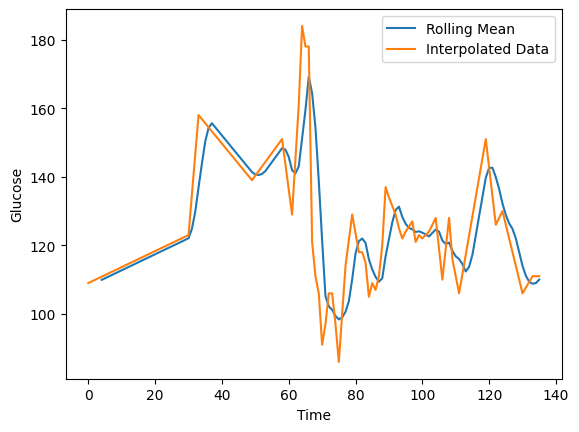

In [54]:
#rolling mean line
plt.plot(df['Rolling Mean'], label='Rolling Mean')
plt.plot(df['interpolated'], label='Interpolated Data')
plt.legend()
plt.ylabel('Glucose')
plt.xlabel('Time')
plt.show()

In [55]:
df['interpolated_poly'] = df['glucose'].interpolate(method = 'polynomial',order=3)
df['interpolated_linear'] = df['glucose'].interpolate(method='linear')
df['interpolated_pad'] = df['glucose'].interpolate(method='pad')
df

,time,ID,recordtype,glucose,interpolated,Rolling Mean,interpolated_poly,interpolated_linear,interpolated_pad
0,2019-04-25 00:08:00,2845,1,109.0,109.000000,NaN,109.000000,109.000000,109.0
1,2019-04-25 00:14:00,-9223372036854775808,0,NaN,109.466667,NaN,55.852405,109.466667,109.0
2,2019-04-25 00:29:00,-9223372036854775808,0,NaN,109.933333,NaN,9.043748,109.933333,109.0
3,2019-04-25 00:44:00,-9223372036854775808,0,NaN,110.400000,NaN,-31.708976,110.400000,109.0
4,2019-04-25 00:50:00,2850,1,NaN,110.866667,109.933333,-66.688776,110.866667,109.0
...,...,...,...,...,...,...,...,...,...
131,2019-04-25 23:02:00,-9223372036854775808,0,NaN,107.666667,111.133333,104.987260,107.666667,106.0
132,2019-04-25 23:18:00,-9223372036854775808,0,NaN,109.333333,109.400000,106.516347,109.333333,106.0
133,2019-04-25 23:31:00,3062,1,111.0,111.000000,108.800000,111.000000,111.000000,111.0
134,2019-04-25 23:33:00,-9223372036854775808,0,NaN,111.000000,109.000000,NaN,111.000000,111.0


In [ ]:
PALETTE = ['red','yellow','green']
pn.Row(
    pn.layout.HSpacer(height = 50,background=PALETTE[0]),
    pn.layout.HSpacer(height = 50,background=PALETTE[1]),
    pn.layout.HSpacer(height = 50,background=PALETTE[2]),
)

In [ ]:
idf = df.interactive()

In [ ]:
value = pn.widgets.IntSlider(name ='Values',start = -4,end = 8,step=2)
value

In [ ]:
mfr = pn.widgets.ToggleGroup(
    name='mfr',
    options =['interpolated_poly','interpolated_linear','interpolated_pad'],
    value=['interpolated_poly','interpolated_linear','interpolated_pad'],
    button_type='success')
mfr

In [ ]:
yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['glucose','interpolated'],
    button_type='success')
yaxis

In [ ]:
columns = df.columns[6:9]
columns

In [ ]:
ihvplot=df.hvplot(x='glucose',y='time', by='glucose',color =PALETTE,line_width=6,height=6)
ihvplot

In [ ]:
# template = pn.template.FastListTemplate(
#     title='Comparison of Different interpolated values with Glucose data',
#     sidebar=[value,'methods',mfr,'Yaxis',yaxis],
#     main=[ihvplot.panel()],
#     accent_base_color='grey',
#     header_background='blue',
# )
# template.show()
dashboard = pn.template.BootstrapTemplate(title='Comparison of Different interpolated values with Glucose data',sidebar_width = 200)
dashboard.sidebar.append(value,'methods',mfr,'Yaxis',yaxis)
dashboard.main.append(ihvplot)
dashboard.show()

In [56]:
def glucose_plot(x='interpolated_poly',y = 'interpolated_linear'):
    graph = figure()
    graph.scatter(x=df[x],y=df[y])
    return graph

In [57]:
columns = df.columns[6:9]
columns

Index(['interpolated_poly', 'interpolated_linear', 'interpolated_pad'], dtype='object')

In [58]:
interactive_plot = pn.interact(glucose_plot,x=columns,y=columns)
interactive_plot

NameError: name 'pn' is not defined

In [ ]:
dashboard = pn.template.BootstrapTemplate(title='Comparison of Different interpolated values with Glucose data',sidebar_width = 200)
dashboard.sidebar.append(interactive_plot[0])
dashboard.main.append(interactive_plot[1])
dashboard.show()